In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('./시도별 전출입 인구수.xlsx',
                   header=0)
df.fillna(method='ffill', inplace=True)
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [3]:
pd.set_option('display.unicode.east_asian_width', 
              True)

In [4]:
mask = (df['전출지별']=='서울특별시') & (
    df['전입지별']!='서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], 
                         axis='columns')
df_seoul.rename({'전입지별':'전입지'}, 
                axis='columns', inplace=True)
df_seoul.set_index('전입지', inplace=True)
print(df_seoul.head())

               1970     1971     1972     1973     1974     1975     1976  \
전입지                                                                      
전국        1448985  1419016  1210559  1647268  1819660  2937093  2495620   
부산광역시    11568    11130    11768    16307    22220    27515    23732   
대구광역시        -        -        -        -        -        -        -   
인천광역시        -        -        -        -        -        -        -   
광주광역시        -        -        -        -        -        -        -   

               1977     1978     1979  ...     2008     2009     2010  \
전입지                                 ...                              
전국        2678007  3028911  2441242  ...  2083352  1925452  1848038   
부산광역시    27213    29856    28542  ...    17353    17738    17418   
대구광역시        -        -        -  ...     9720    10464    10277   
인천광역시        -        -        -  ...    50493    45392    46082   
광주광역시        -        -        -  ...    10846    11725    11095   

In [5]:
sr_one = df_seoul.loc['경기도']
print(sr_one.head())

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object


In [6]:
from matplotlib import font_manager, rc
font_path = '../malgun.ttf'
font_name = font_manager.FontProperties(
    fname=font_path).get_name()
rc('font', family=font_name)

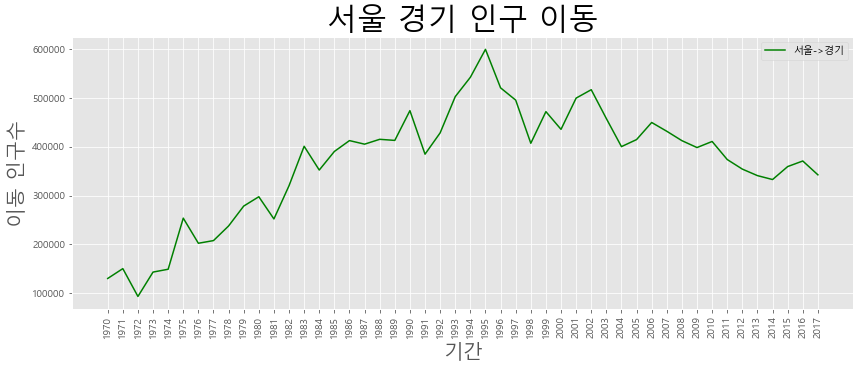

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(14, 5))
#plt.plot(sr_one.index, sr_one.values, c='g')
plt.plot(sr_one, c='g')
plt.xticks(size=10, rotation='vertical')
plt.title('서울 경기 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)
plt.legend(labels=['서울->경기'],loc='best')
plt.show()

In [8]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


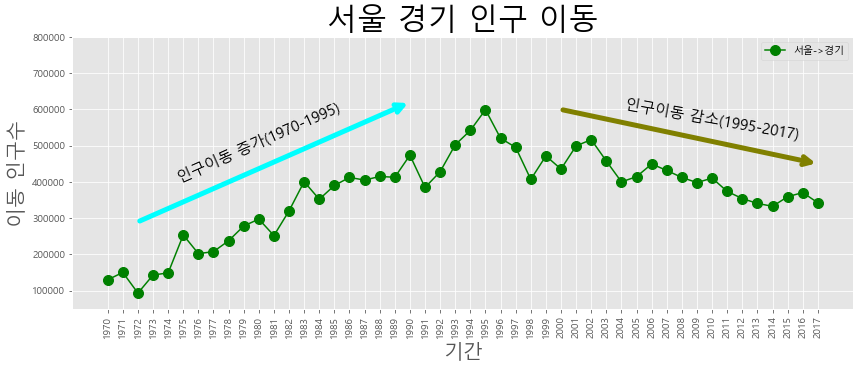

In [42]:
plt.style.use('ggplot')
plt.figure(figsize=(14, 5))
plt.ylim(50000, 800000)
#plt.plot(sr_one.index, sr_one.values, c='g')
plt.plot(sr_one, c='g', marker='o', markersize=10)
plt.annotate('', fontsize=20, 
    xy=(20, 620000), xytext=(2,290000),
    xycoords='data',
    arrowprops=dict(arrowstyle='->', 
                    lw=5,  color='aqua'))
plt.annotate('인구이동 증가(1970-1995)',
            xy=(10,400000), va='baseline',
            ha='center', fontsize=15,
            rotation=24)
plt.annotate('', fontsize=20, 
    xy=(47, 450000), xytext=(30,600000),
    xycoords='data',
    arrowprops=dict(arrowstyle='->', 
                    lw=5,  color='olive'))
plt.annotate('인구이동 감소(1995-2017)',
            xy=(40,520000), va='baseline',
            ha='center', fontsize=15,
            rotation=-10)
plt.xticks(size=10, rotation='vertical')
plt.title('서울 경기 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)
plt.legend(labels=['서울->경기'],loc='best')
plt.show()

In [39]:
import matplotlib
colors = {}
for name, hex in matplotlib.colors.cnames.items():
    colors[name] = hex
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'